Phishing Websites Dataset (UCI Machine Learning Repository, R. Mohammad, F. Thabtah, L. McCluskey, 2015) ga tegishli.

Umumiy ma’lumot

Maqsad: Phishing (firibgarlik) veb-saytlarni aniqlash.

Namunalar soni: 11,055

Xususiyatlar soni: 30 (hammasi integer tipida).

Target (label):

1 → Phishing

-1 → Legitim (haqiqiy)

0 → Shubhali

Missing values: yo‘q.

Ma’lumot manbai: PhishTank, MillerSmiles arxivi, Google qidiruv operatorlari.

Asosiy maqola

Mohammad, R., Thabtah, F., & McCluskey, L. (2012).
An assessment of features related to phishing websites using an automated technique.
International Conference for Internet Technology and Secured Transactions (ICITST), 492–497.

Xususiyatlar (namunalardan ayrimlari)

having_ip_address – URL’da IP manzil ishlatilganmi.

url_length – URL uzunligi.

shortening_service – URL qisqartiruvchi servis (bit.ly, tinyurl va hok.) ishlatilganmi.

having_at_symbol – @ belgisi mavjudmi.

double_slash_redirecting – URL’da ikki martalik // mavjudligi.

prefix_suffix – Domen nomida - mavjudligi.

having_sub_domain – Subdomenlar soni.

sslfinal_state – SSL sertifikatining mavjudligi/holati.

domain_registration_length – Domen ro‘yxatga olingan muddati.

favicon – Sayt faviconining domeni bilan bog‘liqligi.

… va jami 30 ta atribut.

Qo‘llanish sohasi

Klassifikatsiya: phishing vs legitim vs shubhali.

Feature engineering: URL strukturasidan, domen ro‘yxatdan o‘tish muddatidan, HTTPS sertifikatidan va boshqa veb-atributlardan.

Amaliy qo‘llanishlar:

Browser security extensions

Bank va moliya tizimlarida onlayn firibgarlikni aniqlash

ML asosida xavfsizlik monitoringi

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

In [13]:
from google.colab import files

uploaded = files.upload()

Saving .old.arff to .old.arff
Saving Training Dataset.arff to Training Dataset.arff


In [24]:
from scipy.io import arff

# Faylni o‘qish
data, meta = arff.loadarff('/content/Training Dataset.arff')

# Pandas DataFrame ga o‘tkazish
df = pd.DataFrame(data)

# Birinchi 5 qatorni ko‘rish
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

In [26]:
df.shape

(11055, 31)

1. Ma’lumotlarni tozalash

In [27]:
# bytes -> string -> int
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.decode("utf-8")).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [28]:
# Tekshirib ko‘rish
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [40]:
df["Result"].value_counts()

,count
Result,
1,6157
-1,4898


2. X va y qiymatlarni ajratish

In [29]:
X = df.drop("Result", axis=1)
y = df["Result"]  # Target data

3. Train-test bo‘lish

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

4. Klassifikatsiya modeli (Random Forest)

In [47]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1  #n_jobs=-1 - Modelni o‘qitishda nechta CPU yadrosi ishlatilishini belgilaydi.
               #-1 → barcha mavjud yadrolar ishlatiladi (parallel ishlash tezroq bo‘ladi).
              #Masalan, n_jobs=4 qilinsa faqat 4 ta yadro ishlaydi.
)
model.fit(X_train, y_train)

# Feature va class nomlarini belgilash
feature_names = X.columns.tolist()
class_names = ["Legitimate (-1)", "Phishing (1)"]


5. Modelni baholash

In [51]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9742198100407056

Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



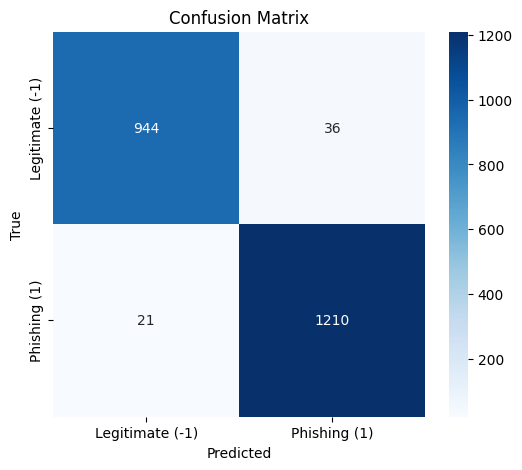

In [48]:
# Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

6. Feature Importance (qaysi atributlar eng muhim?)

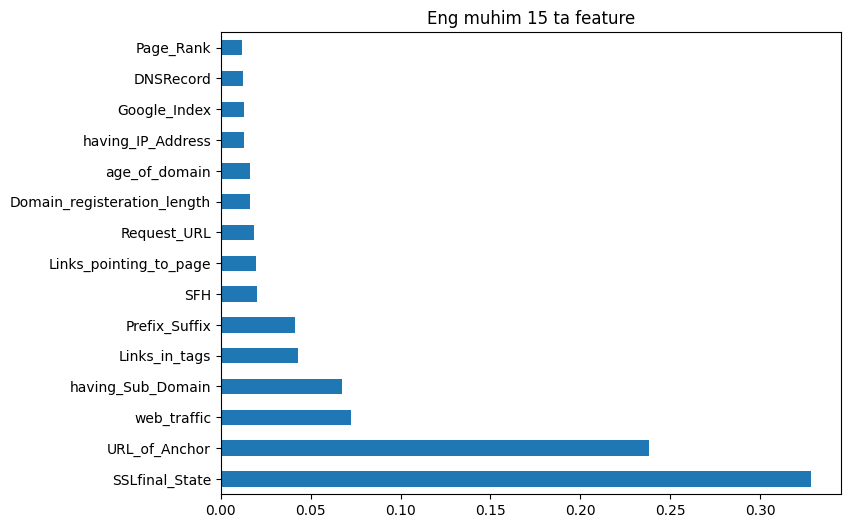

In [49]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind="barh", figsize=(8,6))
plt.title("Eng muhim 15 ta feature")
plt.show()

7. Visualization the first n trees

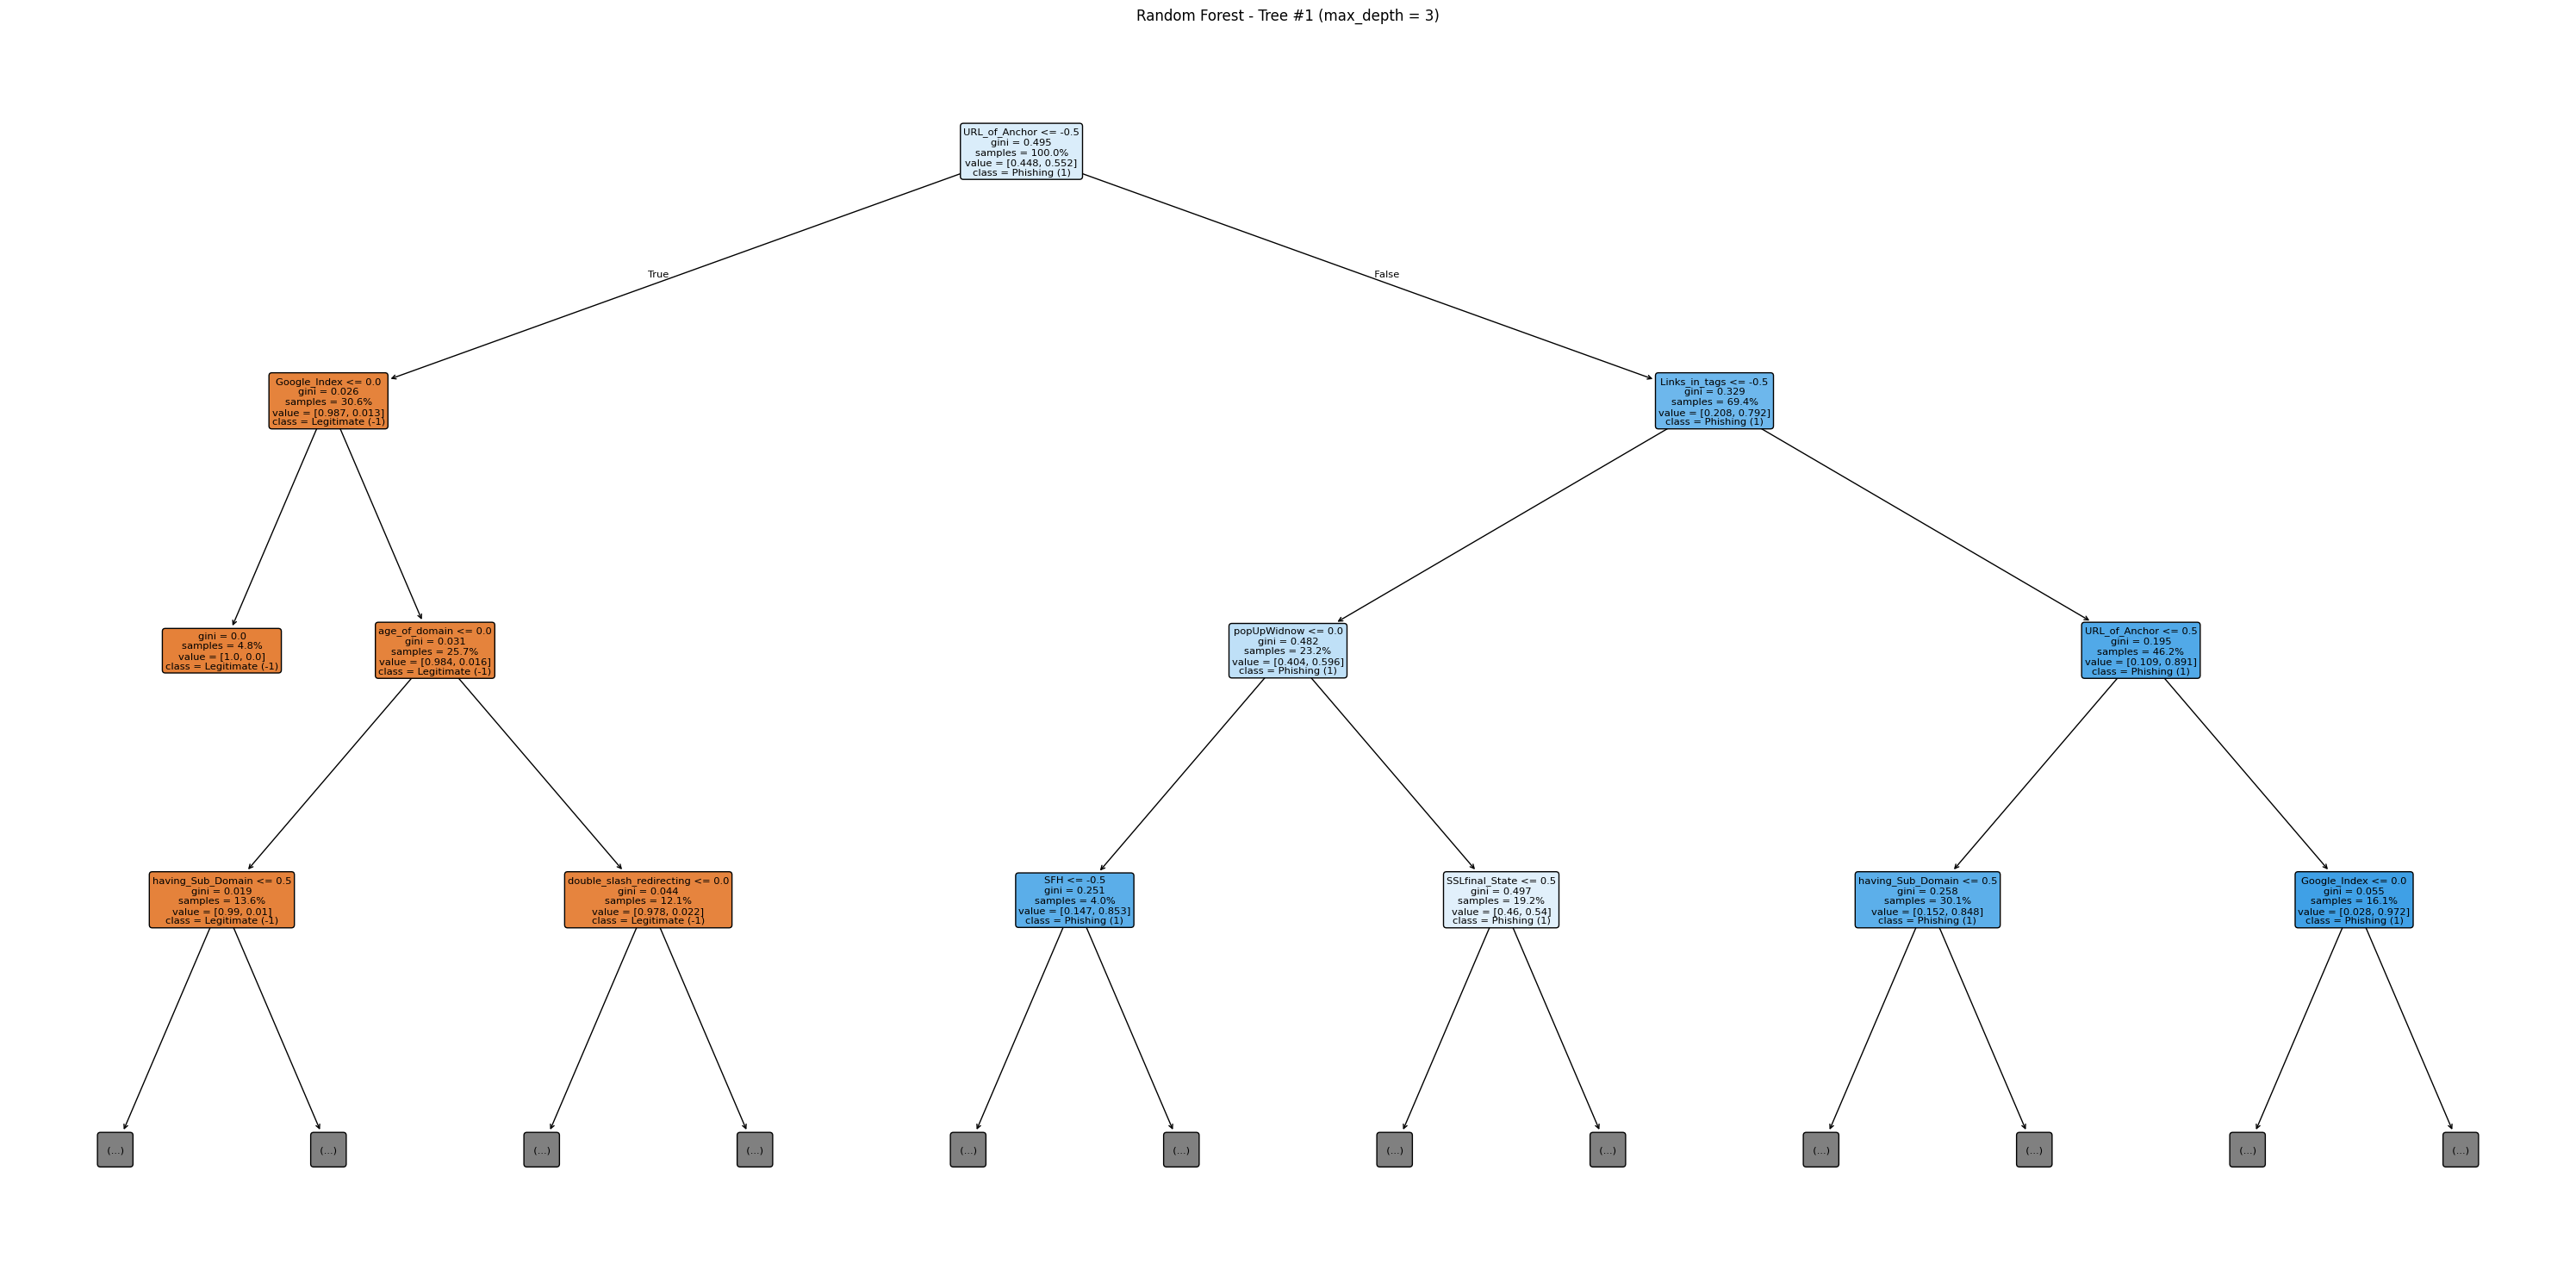

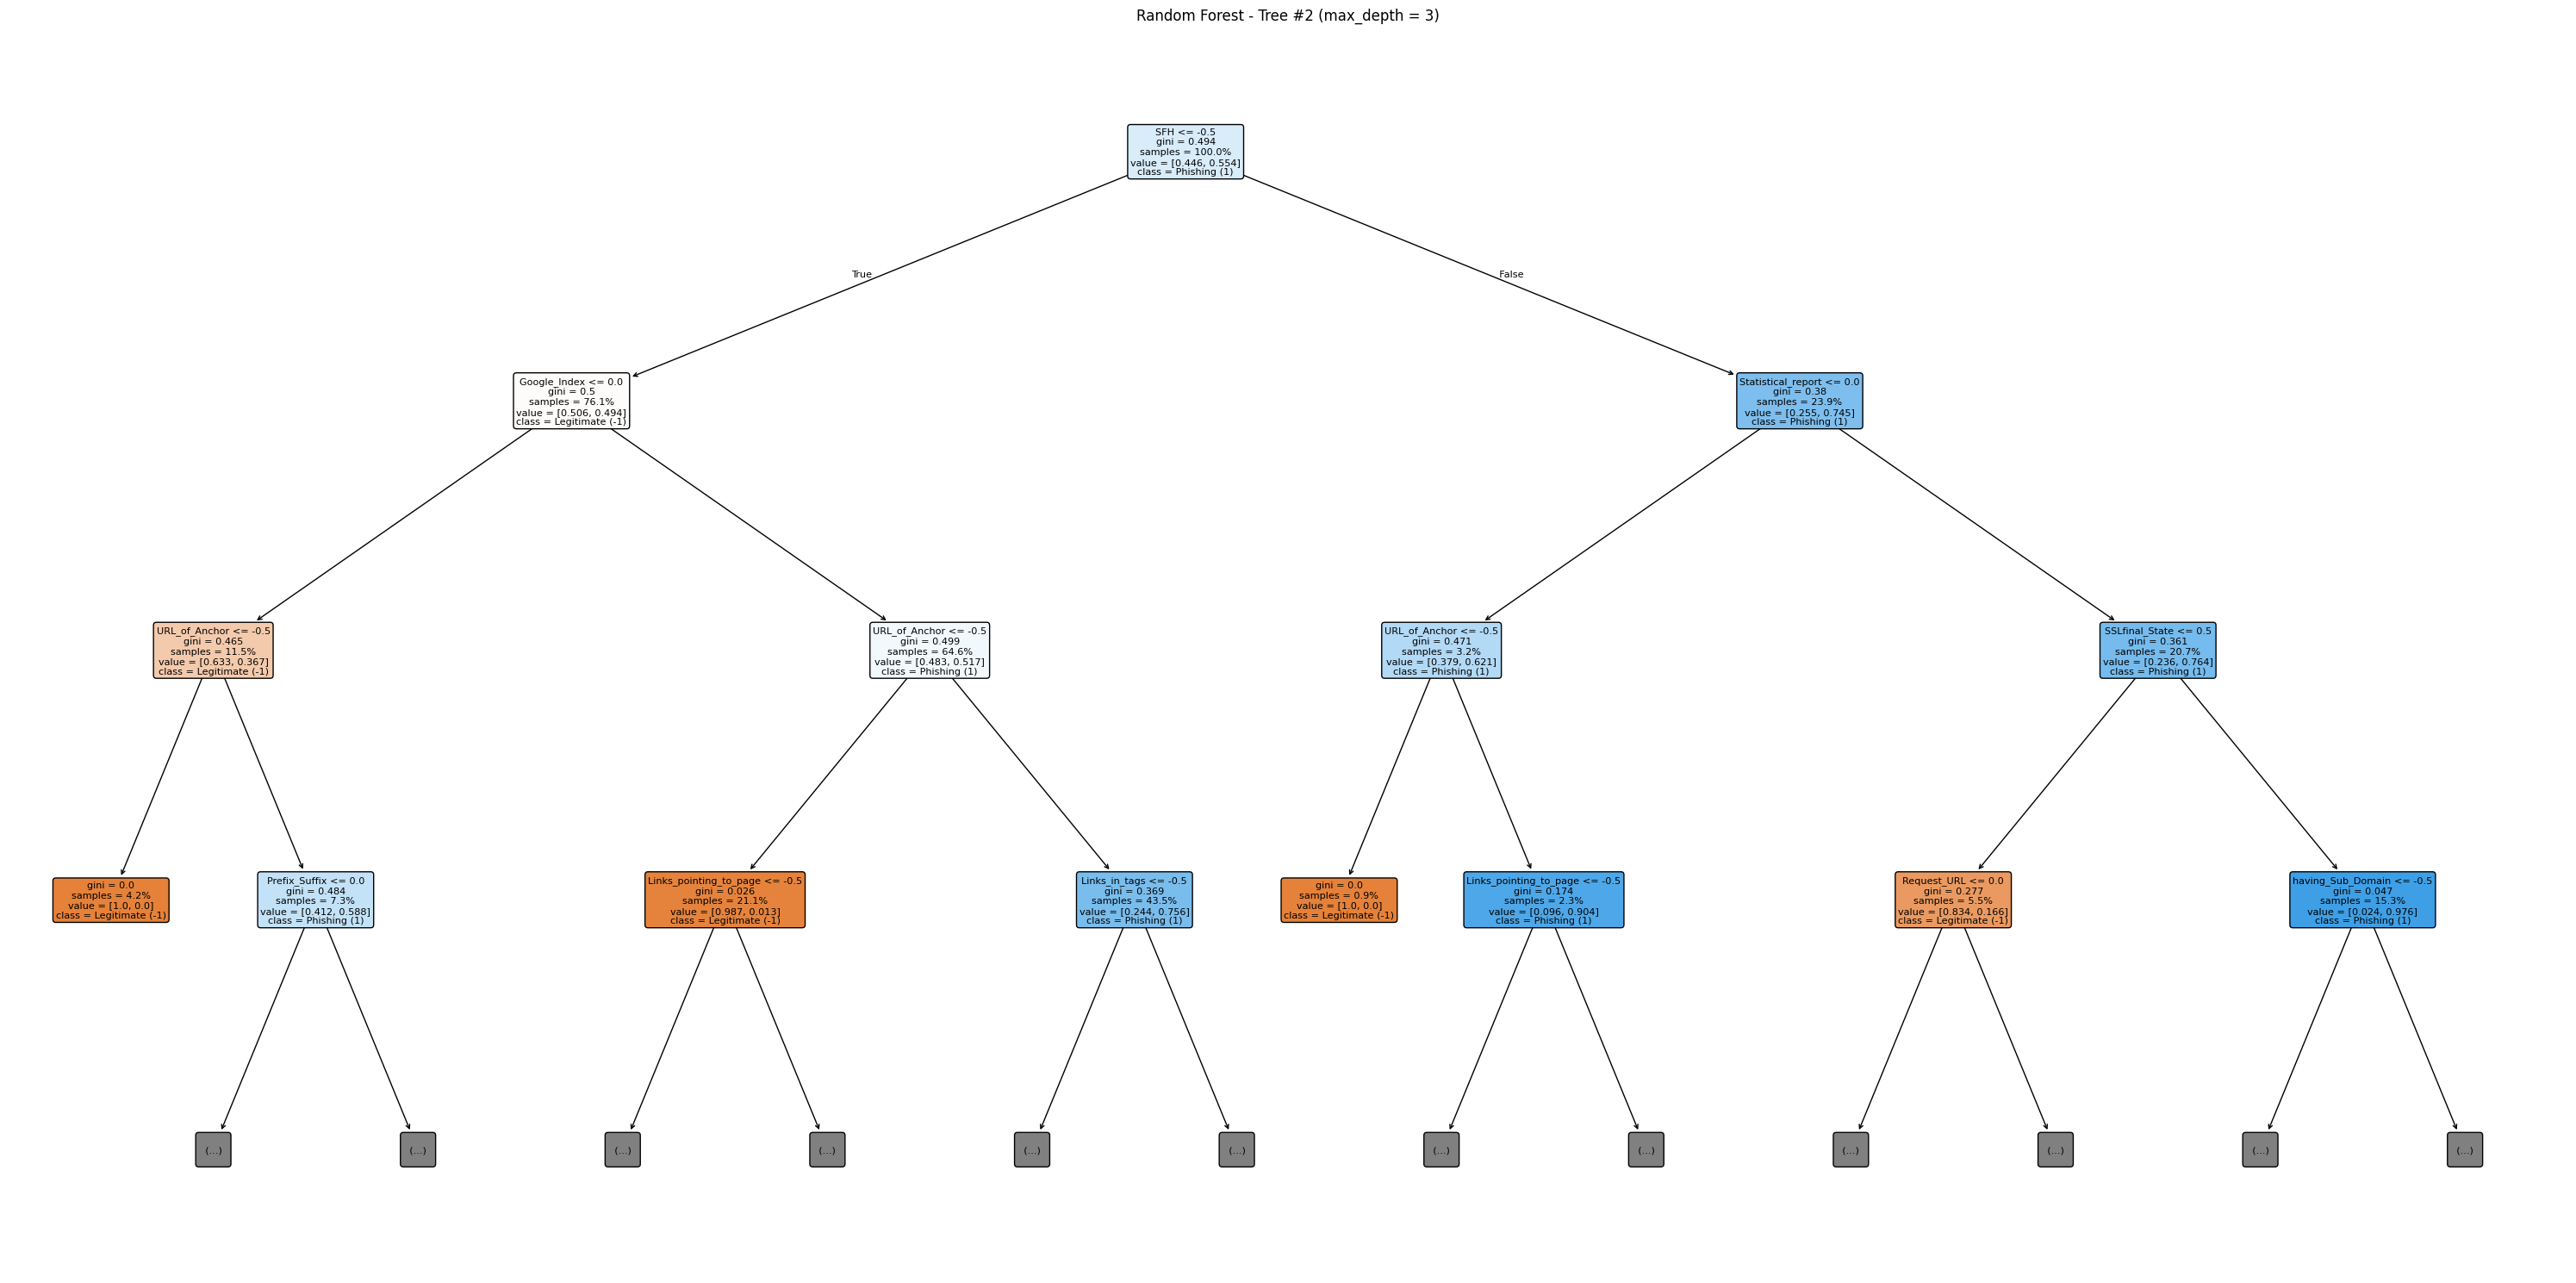

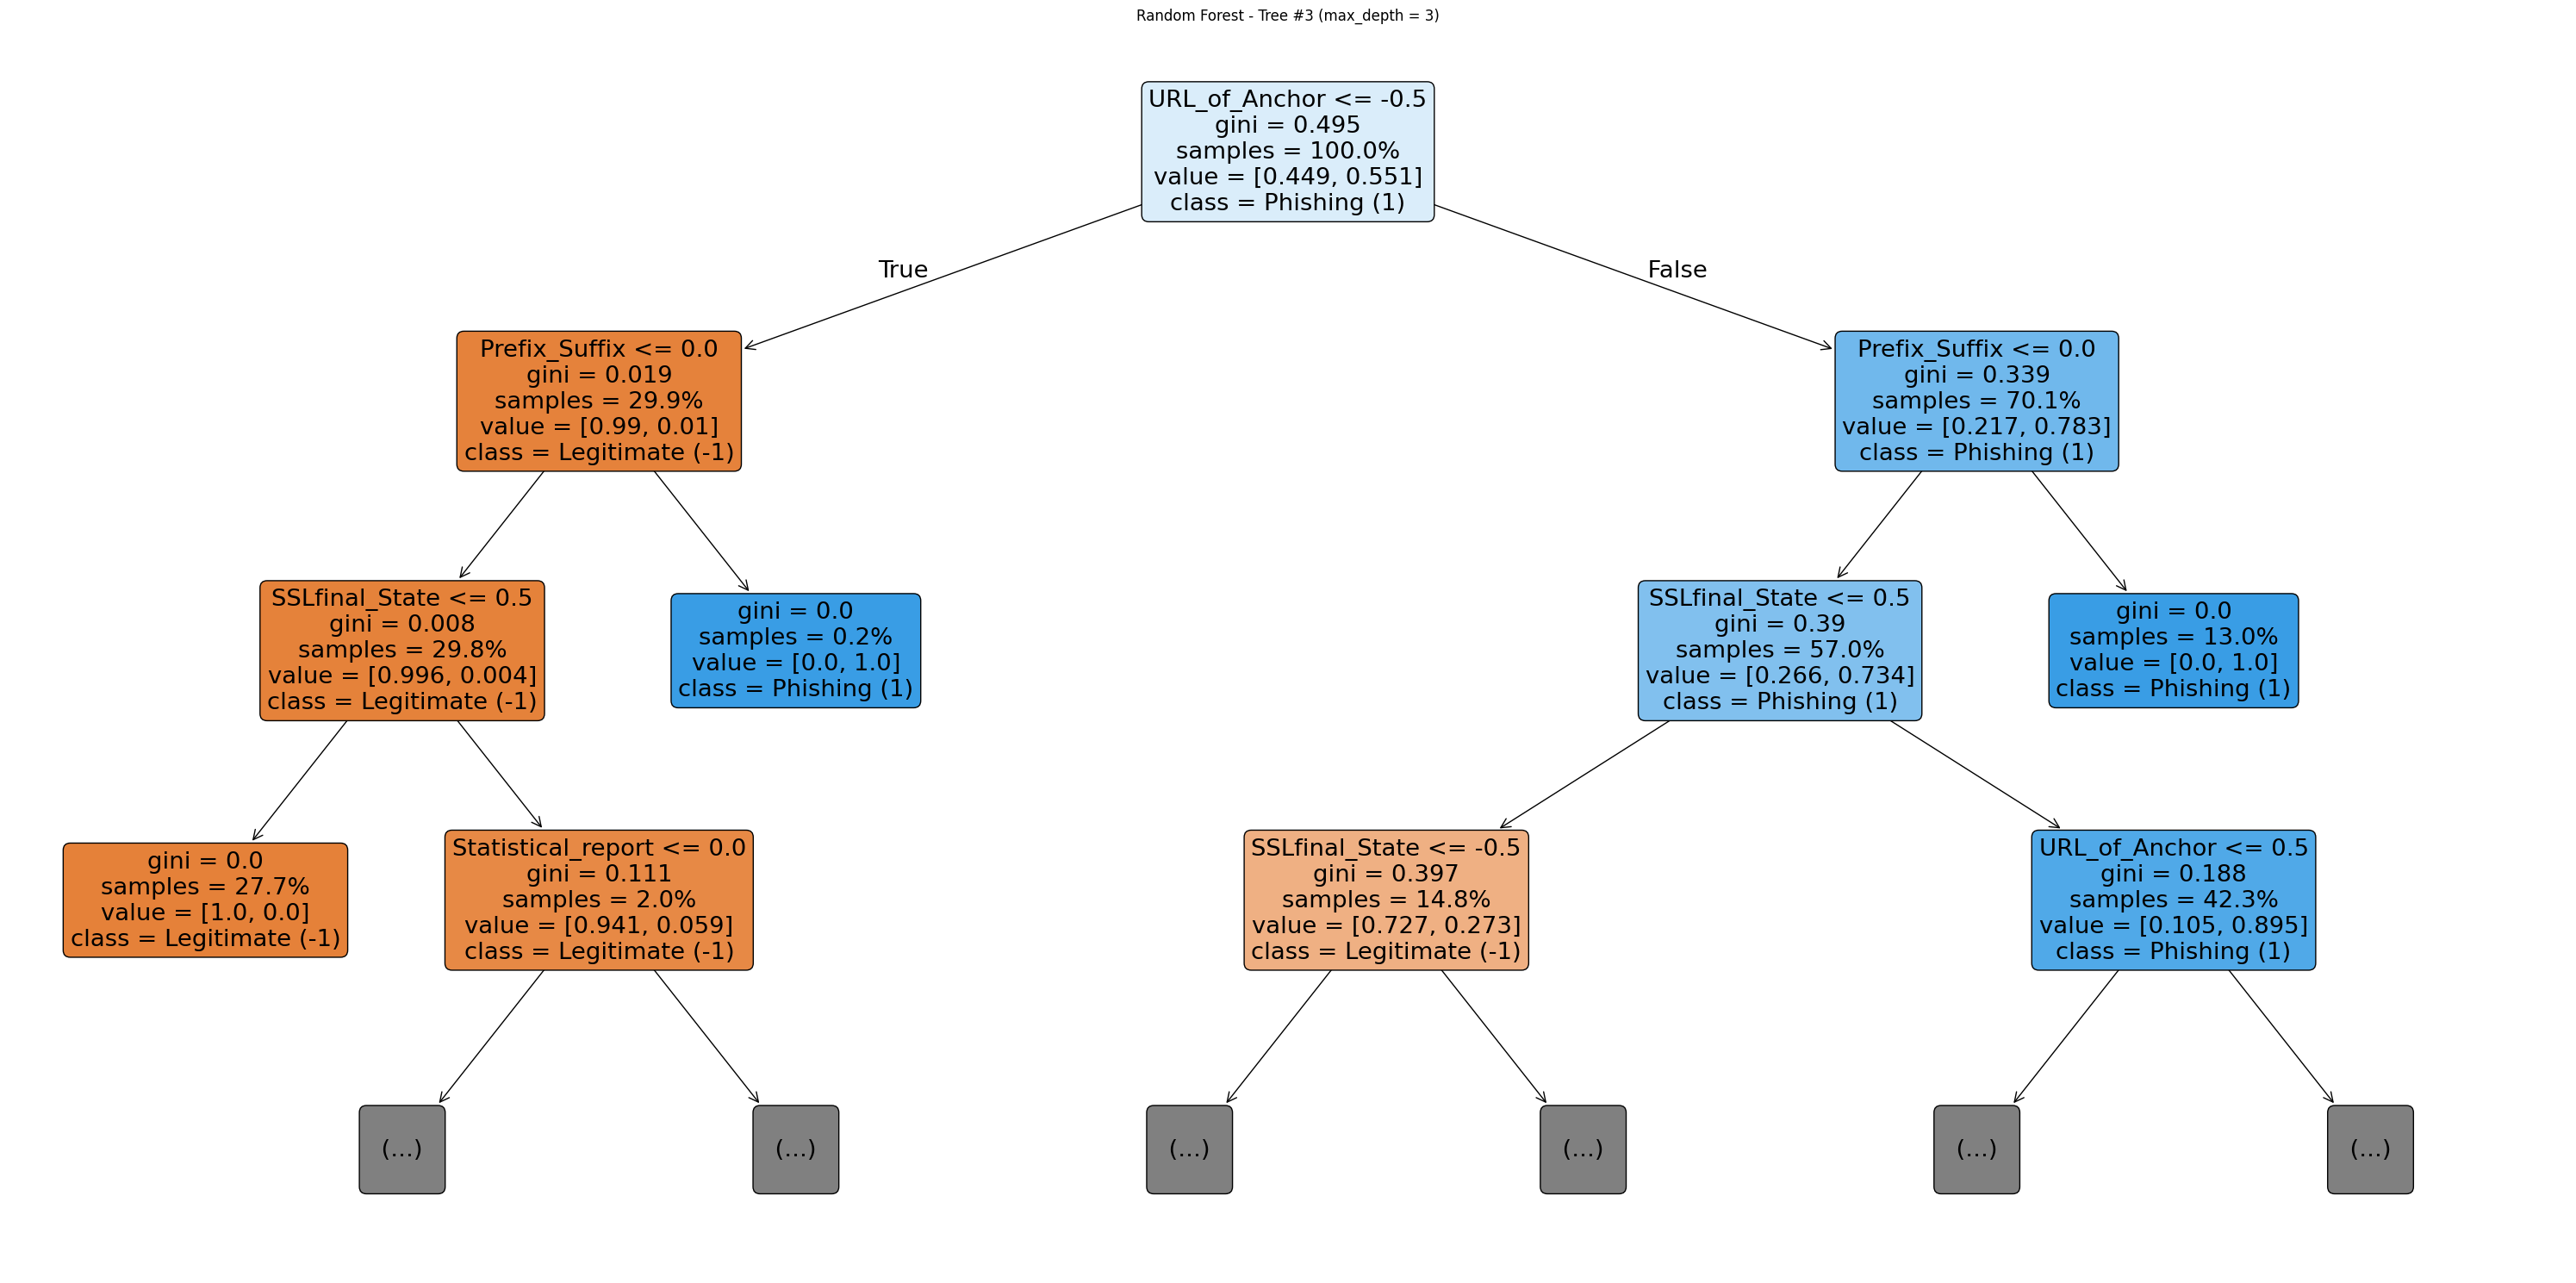

In [50]:
def visualize_forest_trees(forest, feature_names=None, class_names=None, n=3, max_depth=3):
  """
  Plots the first n trees from a fitted RandomForestClassifier.
  max_depth controls how deep the diagram goes (purely for readability).
  """

  n = min(n, len(forest.estimators_))
  # Create one figure per tree for clarity (keeps labels readable)
  for i in range(n):
    estimator = forest.estimators_[i]
    plt.figure(figsize=(30,15))
    plot_tree(
        estimator,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        impurity=True,
        proportion=True,
        max_depth=max_depth             # visualize only top levels

    )
    plt.title(f"Random Forest - Tree #{i+1} (max_depth = {max_depth})")
    plt.tight_layout()
    plt.show()

# show first 3 trees (only top 3 levels to keep it readable)
visualize_forest_trees(model, feature_names, class_names, n=3, max_depth=3)